In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# Load the iris dataset
iris = load_iris()

# Use only 2 features for simplicity (e.g., sepal length and width)
X = pd.DataFrame(iris.data, columns=iris.feature_names)[['sepal length (cm)', 'sepal width (cm)']]


In [ ]:
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
silhouette_scores = []
ks = range(2, 11)

for k in ks:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(X_train_scaled)
    score = silhouette_score(X_train_scaled, labels)
    silhouette_scores.append(score)

# Find the best K
best_k_index = np.argmax(silhouette_scores)
best_k = ks[best_k_index]
print(f"Best K: {best_k}")
print(f"Silhouette Score: {silhouette_scores[best_k_index]}")


Best K: 3
Silhouette Score: 0.4447831877432762


In [6]:
kmeans_final = KMeans(n_clusters=best_k, init='k-means++', random_state=42)
train_labels = kmeans_final.fit_predict(X_train_scaled)
test_labels = kmeans_final.predict(X_test_scaled)

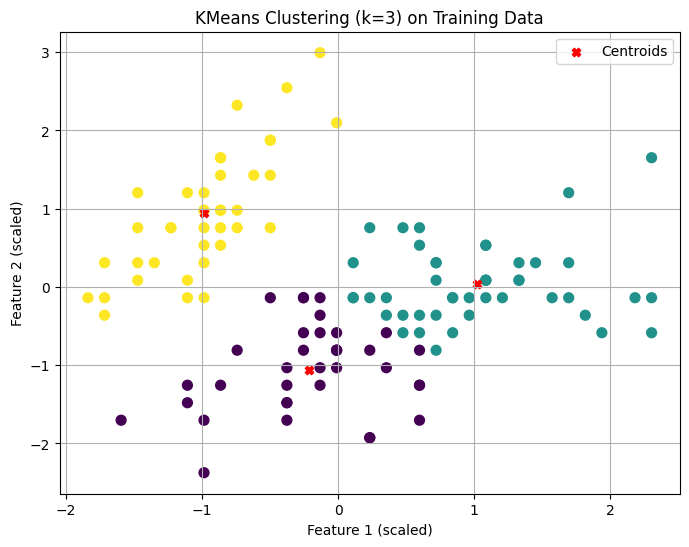

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=train_labels, cmap='viridis', s=50)
plt.scatter(kmeans_final.cluster_centers_[:, 0], kmeans_final.cluster_centers_[:, 1],
            c='red', marker='X', label='Centroids')
plt.title(f"KMeans Clustering (k={best_k}) on Training Data")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.legend()
plt.grid(True)
plt.show()


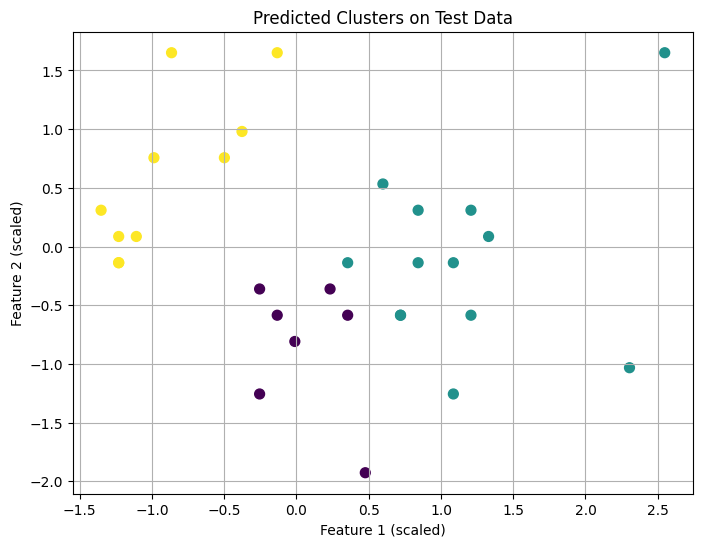

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=test_labels, cmap='viridis', s=50)
plt.title("Predicted Clusters on Test Data")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.grid(True)
plt.show()
